# Neural Network using Tensorflow

In [3]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#### Dataset used for this project: https://www.kaggle.com/jojoker/singapore-airbnb

## Data cleaning and pre-processing

In [4]:
data = pd.read_csv("listings.csv", skiprows = 0)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,last_review_year,years_last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,21/10/13,2013.0,7,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,26/12/14,2014.0,6,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,1/10/15,2015.0,5,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,11/8/19,2019.0,1,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,28/7/19,2019.0,1,0.22,9,355


In order to be put through a Neural Network, the dataset requires certain preprocessing steps:
1. Convert all categorical variables into dummy variables. I will do this using One Hot Encoding. For every category in a feature, a new column will be created, and if an instance belongs to that category, its value will be '1'.
2. Normalise all values. The data in the dataset is in many different scales, and needs to be normalised in order to eliminate any bias towards a single feature.
3. The dependent variable is price; I am interested in classifying the prices of the different listings into 'Tiers'. Since 'price' is a continuous variable, I will be splitting it into different tiers to make it categorical.

In [5]:
# Create dummy variables for categorical data

def convert_to_categorical(col_name):
    data[col_name] = data[col_name].astype('category')

convert_to_categorical('neighbourhood_group')
convert_to_categorical('room_type')

print(data['room_type'].cat.categories)
print(data['neighbourhood_group'].cat.categories)

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object')
Index(['Central Region', 'East Region', 'North Region', 'North-East Region',
       'West Region'],
      dtype='object')


In [6]:
# Convert price to categorical variables based on price value

price_ranges = []
for i in range(0, len(data['price'])):
    if data['price'][i] < 50:
        price_ranges.append("4")
    elif data['price'][i] < 100:
        price_ranges.append("3")
    elif data['price'][i] < 150:
        price_ranges.append("2")
    elif data['price'][i] < 230:
        price_ranges.append("1")
    else:
        price_ranges.append("0")

data['price_range'] = price_ranges
convert_to_categorical('price_range')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,last_review_year,years_last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,21/10/13,2013.0,7,0.01,2,365,3
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,26/12/14,2014.0,6,0.28,1,365,3
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,1/10/15,2015.0,5,0.20,2,365,3
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,11/8/19,2019.0,1,0.15,9,353,1
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,28/7/19,2019.0,1,0.22,9,355,3


In [7]:
# Normalise numeric variables

def normalise(col_name):
    col = data[col_name]
    deno = 1/(col.max()-col.min())
    #print(deno)
    data[col_name] = (col-col.min())*deno
    
normalise('minimum_nights')
normalise('number_of_reviews')
normalise('years_last_review')
normalise('calculated_host_listings_count')
normalise('availability_365')

    
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,last_review_year,years_last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,0.179179,0.003096,21/10/13,2013.0,0.666667,0.01,0.003663,1.000000,3
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,0.089089,0.055728,26/12/14,2014.0,0.555556,0.28,0.000000,1.000000,3
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,0.005005,0.061920,1/10/15,2015.0,0.444444,0.20,0.003663,1.000000,3
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,0.000000,0.043344,11/8/19,2019.0,0.000000,0.15,0.029304,0.967123,1
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,0.000000,0.068111,28/7/19,2019.0,0.000000,0.22,0.029304,0.972603,3


In [8]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,last_review_year,years_last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,0.002002,0.0,NaN,NaN,1.0,NaN,0.109890,0.167123,2
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,0.005005,0.0,NaN,NaN,1.0,NaN,0.120879,1.000000,0
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,0.029029,0.0,NaN,NaN,1.0,NaN,0.007326,0.473973,3
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,0.013013,0.0,NaN,NaN,1.0,NaN,0.003663,0.082192,3
7906,38112762,Amazing room with private bathroom walk to Orc...,28788520,Terence,Central Region,River Valley,1.29672,103.83325,Private room,65,0.089089,0.0,NaN,NaN,1.0,NaN,0.021978,1.000000,3


I now need to drop the original columns for which I applied One-Hot Encoding

In [9]:
data_final = data.drop(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'last_review', 'last_review_year', 'reviews_per_month'], axis=1)

In [10]:
data_final.head()

,id,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,years_last_review,calculated_host_listings_count,availability_365,price_range
0,49091,North Region,Private room,83,0.179179,0.003096,0.666667,0.003663,1.000000,3
1,50646,Central Region,Private room,81,0.089089,0.055728,0.555556,0.000000,1.000000,3
2,56334,North Region,Private room,69,0.005005,0.061920,0.444444,0.003663,1.000000,3
3,71609,East Region,Private room,206,0.000000,0.043344,0.000000,0.029304,0.967123,1
4,71896,East Region,Private room,94,0.000000,0.068111,0.000000,0.029304,0.972603,3


In [11]:
new_cols = pd.get_dummies(data_final['neighbourhood_group'],prefix='neighbourhood_group')
data_final = pd.concat([data_final,new_cols.round().astype(int)], axis=1)

new_cols = pd.get_dummies(data_final['room_type'],prefix='room_type')
data_final = pd.concat([data_final,new_cols.round().astype(int)], axis=1)
    
data_final.head()

,id,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,years_last_review,calculated_host_listings_count,availability_365,price_range,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,49091,North Region,Private room,83,0.179179,0.003096,0.666667,0.003663,1.000000,3,0,0,1,0,0,0,1,0
1,50646,Central Region,Private room,81,0.089089,0.055728,0.555556,0.000000,1.000000,3,1,0,0,0,0,0,1,0
2,56334,North Region,Private room,69,0.005005,0.061920,0.444444,0.003663,1.000000,3,0,0,1,0,0,0,1,0
3,71609,East Region,Private room,206,0.000000,0.043344,0.000000,0.029304,0.967123,1,0,1,0,0,0,0,1,0
4,71896,East Region,Private room,94,0.000000,0.068111,0.000000,0.029304,0.972603,3,0,1,0,0,0,0,1,0


In [12]:
# Check distribution between the categories of the prices
data_final['price_range'].value_counts()

3    2148
2    1683
1    1570
0    1491
4    1015
Name: price_range, dtype: int64

Now I will grab all the values in the dataset and store it in a series, so I can split it into train and test.

In [38]:
data_values = data_final.values
data_values

array([[49091, 'North Region', 'Private room', ..., 0, 1, 0],
       [50646, 'Central Region', 'Private room', ..., 0, 1, 0],
       [56334, 'North Region', 'Private room', ..., 0, 1, 0],
       ...,
       [38109336, 'Central Region', 'Private room', ..., 0, 1, 0],
       [38110493, 'Central Region', 'Private room', ..., 0, 1, 0],
       [38112762, 'Central Region', 'Private room', ..., 0, 1, 0]],
      dtype=object)

In [39]:
print(data_values[:, [4,5,6,7,8,10,11,12,13,14,15,16,17]])

[[0.17917917917917917 0.0030959752321981426 0.6666666666666666 ... 0 1 0]
 [0.0890890890890891 0.05572755417956657 0.5555555555555556 ... 0 1 0]
 [0.005005005005005005 0.061919504643962855 0.4444444444444444 ... 0 1 0]
 ...
 [0.029029029029029027 0.0 1.0 ... 0 1 0]
 [0.013013013013013013 0.0 1.0 ... 0 1 0]
 [0.0890890890890891 0.0 1.0 ... 0 1 0]]


## Building the Neural Network

Now I will split the data so the training data has all the features I want to use for predicting, and training labels has the column of the dependent variable.

In [40]:
train_data = data_values[:, [4,5,6,7,8,10,11,12,13,14,15,16,17]] #,6,16,18,19, 13:87
train_labels = data_values[:, [9]]

Data needs to be converted to float before fit.

In [41]:
train_data = train_data.astype('float32')
train_labels = train_labels.astype('float32')

The last layer (output layer) in the model represents the output layer, and the number **must be the number of categories in the dependent variable**. In this case, it is 5.\
The model needs at least one more layer, called the input layer, which can be any optimal number. Any additional number of layers can be added to maximise accuracy.

In [42]:
model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(1, 6)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(80, activation=tf.nn.relu),
    keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [43]:
# Select optimiser and set learning rate
optimiser = keras.optimizers.Adam(lr=0.00146)
model.compile(
              #optimizer='adam',  #update weights
              optimizer = optimiser, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.fit(train_data, train_labels, epochs=250)

Epoch 1/250
7907/7907 [==============================] - 0s 50us/sample - loss: 1.2817 - acc: 0.4310
Epoch 2/250
7907/7907 [==============================] - 0s 39us/sample - loss: 1.2168 - acc: 0.4549
Epoch 3/250
7907/7907 [==============================] - 0s 40us/sample - loss: 1.1994 - acc: 0.4542
Epoch 4/250
7907/7907 [==============================] - 0s 41us/sample - loss: 1.1852 - acc: 0.4609
Epoch 5/250
7907/7907 [==============================] - 0s 39us/sample - loss: 1.1784 - acc: 0.4725
Epoch 6/250
7907/7907 [==============================] - 0s 39us/sample - loss: 1.1749 - acc: 0.4703
Epoch 7/250
7907/7907 [==============================] - 0s 40us/sample - loss: 1.1656 - acc: 0.4760
Epoch 8/250
7907/7907 [==============================] - 0s 40us/sample - loss: 1.1616 - acc: 0.4855
Epoch 9/250
7907/7907 [==============================] - 0s 39us/sample - loss: 1.1556 - acc: 0.4819
Epoch 10/250
7907/7907 [==============================] - 0s 39us/sample - loss: 1.1506 - a

In [45]:
train_loss, train_acc = model.evaluate(train_data, train_labels)
print('Train accuracy:', train_acc)

7907/7907 [==============================] - 0s 25us/sample - loss: 0.7906 - acc: 0.6497
Train accuracy: 0.6496775


In [29]:
predictions = model.predict(train_data)
print(predictions)

[[1.76734924e-01 4.48506653e-05 1.65236361e-05 2.42922962e-01
  5.80280781e-01]
 [1.86524726e-03 9.51768365e-03 1.78329155e-01 7.95143545e-01
  1.51443230e-02]
 [1.87031063e-03 8.00436654e-04 2.27981880e-02 9.64544654e-01
  9.98653192e-03]
 ...
 [2.75170617e-02 1.07018106e-01 7.27057606e-02 7.48385191e-01
  4.43738885e-02]
 [1.04108416e-02 8.47344007e-03 1.67663977e-01 6.53207541e-01
  1.60244241e-01]
 [9.64172010e-04 3.52909416e-03 1.92151517e-01 5.29897809e-01
  2.73457348e-01]]


In [30]:
class_names = ['Tier 1', 'Tier 2', 'Tier 3' , 'Tier 4', 'Tier 5']

In [31]:
def plot_image(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  


  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(True)
  plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue') # represents true values

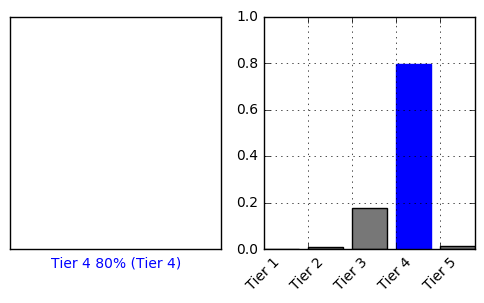

In [50]:
i = 1
train_labels = train_labels.astype('int64')
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, train_labels)
plt.subplot(1,2,2)
plot_value_array(i, predictions, train_labels)
plt.xticks(range(5), class_names, rotation=45)
plt.show()

In [145]:
layer0 = model.get_layer(index=0)

In [146]:
layer0.get_weights()

[array([[-0.18674241,  0.24940658,  0.88589954, ..., -1.1034554 ,
          0.00310893,  0.84842926],
        [ 1.1051497 , -2.0854373 ,  0.44104156, ...,  0.08982359,
          0.3228259 , -0.21846537],
        [-0.18006766,  0.5197054 ,  0.37059048, ..., -0.01703309,
         -0.2685115 ,  0.12550186],
        ...,
        [-0.32799396, -0.06045098, -0.19737516, ..., -0.05109093,
          0.02189204,  0.09601667],
        [-0.16661133,  0.12063801, -0.03269119, ..., -0.04554161,
          0.28225532,  0.18292621],
        [ 0.45211104, -0.2118035 ,  0.3110312 , ..., -0.07790495,
         -0.55612284, -0.30714282]], dtype=float32),
 array([-0.15830158,  0.05732983,  0.02900032,  0.16179599, -0.07385469,
        -0.2218519 ,  0.00395774,  0.01214693,  0.02299785, -0.03010471,
        -0.02822017, -0.06478544, -0.01374459,  0.03191923, -0.04363555,
        -0.03678121,  0.02420382, -0.05131304, -0.01915859, -0.06190535,
        -0.08651789,  0.14220199,  0.05668667,  0.06712507, -0.040

In [147]:
layer1 = model.get_layer(index=1)

In [148]:
layer1.get_weights()

[array([[ 0.00678659,  0.111145  , -0.03180636, ...,  0.18612924,
          0.2141762 ,  0.35176605],
        [ 0.1305516 , -0.1419182 , -0.15214276, ...,  0.08185596,
          0.25749025,  0.09818221],
        [-0.06915281, -0.46985826, -0.12233894, ..., -0.20714001,
          0.00353544, -0.5821799 ],
        ...,
        [-0.20107555, -0.10093556,  0.04509256, ..., -0.05581414,
         -0.5681766 , -0.19570276],
        [ 0.33268917, -0.12685582, -0.09110271, ..., -0.05945885,
          0.04142801,  0.42288515],
        [-0.0412394 ,  0.35894963, -0.06843226, ...,  0.12702264,
          0.17881468,  0.20645542]], dtype=float32),
 array([ 0.22074874,  0.01787929, -0.10621922,  0.06321704, -0.22459133,
         0.2752304 ,  0.2616781 , -0.43440065,  0.13178827, -0.0361787 ,
        -0.0623253 ,  0.10368311, -0.01845839, -0.03888223,  0.02794802,
        -0.17868797, -0.37407205,  0.08761197,  0.14800131, -0.04640891,
        -0.11873493,  0.02028976,  0.1843934 , -0.07692171,  0.127

In [149]:
predictionsDF = pd.DataFrame(
    data=predictions)

In [150]:
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=False, index=False)

In [151]:
PredictedLabels = np.ndarray.copy(train_labels)
PredictedOutcomes = np.ndarray.copy(train_labels)
for i in range(len(train_labels)):
  PredictedLabels[i] = np.argmax(predictions[i])
  if PredictedLabels[i] == train_labels[i]:
    PredictedOutcomes[i] = 1
  else:
    PredictedOutcomes[i] = 0

In [152]:
TrainDataLabels = np.append(train_data, train_labels, axis=1)
TrainDataLabelsPredictions = np.append(TrainDataLabels, PredictedLabels, axis=1)
TrainDataLabelsPredictionsOutcomes = np.append(TrainDataLabelsPredictions, PredictedOutcomes, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)

In [153]:
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb)

In [154]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=False, index=False)

In [155]:
SingleObservation = np.array([[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9 ]])
SinglePrediction = model.predict(SingleObservation)

In [156]:
SinglePrediction[0]

array([1.0915687e-29, 1.9055812e-21, 1.6238901e-15, 2.7422844e-02,
       9.7257710e-01], dtype=float32)

In [157]:
np.max(SinglePrediction[0])

0.9725771

In [158]:
np.argmax(SinglePrediction[0])

4

In [159]:
class_names[np.argmax(SinglePrediction[0])]

'Tier 5'

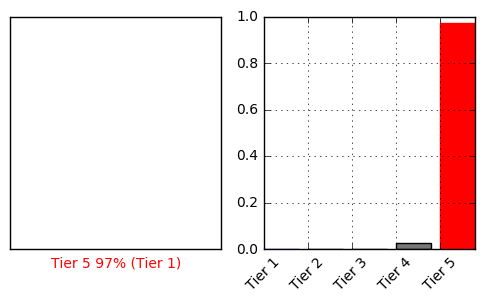

In [160]:
BlankLabels = np.array([[0, 0, 0, 0, 0]])

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, SinglePrediction, BlankLabels)
plt.subplot(1,2,2)
plot_value_array(i, SinglePrediction, BlankLabels)
plt.xticks(range(5), class_names, rotation=45)
plt.show()

## Future Work

1. Predict price as a continuous variable instead of discrete.
2. Increase accuracy of model by optimising hyperparameters.
3. Determine the most important independent variable for price prediction.

Refer to accuracy.pdf to see the changes made to improve the model from it's baseline accuracy.